<h2 style = "color:darkblue"> Projeto Mega - V7.JF </h2>
<h3> Nova Análise Matemáticas incluindo numero do concurso sorteado</h3>
<img src = "imagens/LogoJoao-2019.png" alt="Nada" style = "float:left;width:100px; height:100px">

In [1]:
# imports iniciais 
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
from IPython.core.display import HTML

%matplotlib inline

In [2]:
df = pd.read_csv("data/dadosSomaDivMaxDivmin.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head(5)

,Concurso,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Soma,Divsqmax,Divsqmin,Divmedia
0,2.0,9.0,39.0,37.0,49.0,43.0,41.0,218.0,0.631884,10.380952,1.252047
1,3.0,36.0,30.0,10.0,11.0,29.0,47.0,163.0,0.472464,7.761905,0.936164
2,11.0,25.0,15.0,58.0,37.0,59.0,38.0,232.0,0.672464,11.047619,1.332454
3,17.0,10.0,20.0,6.0,19.0,51.0,13.0,119.0,0.344928,5.666667,0.683457
4,24.0,1.0,8.0,14.0,28.0,33.0,43.0,127.0,0.368116,6.047619,0.729404


In [3]:
df.sample(15)

,Concurso,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Soma,Divsqmax,Divsqmin,Divmedia
371,1595.0,59.0,5.0,42.0,8.0,46.0,2.0,162.0,0.469565,7.714286,0.930420
158,785.0,35.0,5.0,37.0,8.0,48.0,17.0,150.0,0.434783,7.142857,0.861500
254,1195.0,27.0,17.0,57.0,26.0,55.0,20.0,202.0,0.585507,9.619048,1.160154
39,199.0,52.0,37.0,57.0,16.0,10.0,50.0,222.0,0.643478,10.571429,1.275020
232,1105.0,43.0,1.0,50.0,28.0,57.0,15.0,194.0,0.562319,9.238095,1.114207
486,2074.0,42.0,8.0,18.0,37.0,58.0,23.0,186.0,0.539130,8.857143,1.068260
49,233.0,45.0,3.0,24.0,36.0,7.0,32.0,147.0,0.426087,7.000000,0.844270
37,191.0,58.0,5.0,41.0,3.0,1.0,23.0,131.0,0.379710,6.238095,0.752377
296,1373.0,52.0,39.0,7.0,27.0,55.0,57.0,237.0,0.686957,11.285714,1.361171
468,1977.0,28.0,3.0,32.0,34.0,37.0,16.0,150.0,0.434783,7.142857,0.861500


<h2 style = "color:darkred">Atividade deste notebook:</h2>
<p>Neste notebook, farei um novo experimento envolvendo a soma dos 06 números sorteados e analisar se existe alguma caracteristica que possa levar a alguma previsão em sorteios futuros.<br>
    A idéia é usar a soma dos numeros sorteados e dividir pelo numero sequencial dos sorteios. Lembrando que os sorteios que aparecem nesta tabela vem a ser dos jogos que tiveram pelo menos 01 ganhador, ou seja, são os sorteios onde acertaram as 06 dezenas. <br>
    Pretendo envolver um novo parametro, o numero do sorteio, procurando relação com jogos que produziram ganhadores (acertadores). 
    </p>

In [4]:
#criação da nova coluna SomaPorJogo
df["SomaPorJogo"] = df['Soma']/df['Concurso']
df.head(10)

,Concurso,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Soma,Divsqmax,Divsqmin,Divmedia,SomaPorJogo
0,2.0,9.0,39.0,37.0,49.0,43.0,41.0,218.0,0.631884,10.380952,1.252047,109.000000
1,3.0,36.0,30.0,10.0,11.0,29.0,47.0,163.0,0.472464,7.761905,0.936164,54.333333
2,11.0,25.0,15.0,58.0,37.0,59.0,38.0,232.0,0.672464,11.047619,1.332454,21.090909
3,17.0,10.0,20.0,6.0,19.0,51.0,13.0,119.0,0.344928,5.666667,0.683457,7.000000
4,24.0,1.0,8.0,14.0,28.0,33.0,43.0,127.0,0.368116,6.047619,0.729404,5.291667
5,29.0,14.0,56.0,58.0,8.0,43.0,3.0,182.0,0.527536,8.666667,1.045287,6.275862
6,33.0,5.0,33.0,49.0,17.0,42.0,39.0,185.0,0.536232,8.809524,1.062517,5.606061
7,41.0,38.0,26.0,35.0,39.0,12.0,47.0,197.0,0.571014,9.380952,1.131437,4.804878
8,49.0,33.0,7.0,43.0,35.0,13.0,55.0,186.0,0.539130,8.857143,1.068260,3.795918
9,54.0,5.0,21.0,9.0,56.0,18.0,36.0,145.0,0.420290,6.904762,0.832784,2.685185


In [5]:
df.tail(10)

,Concurso,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Soma,Divsqmax,Divsqmin,Divmedia,SomaPorJogo
495,2118.0,41.0,11.0,12.0,46.0,20.0,40.0,170.0,0.492754,8.095238,0.976367,0.080264
496,2121.0,37.0,8.0,17.0,29.0,10.0,40.0,141.0,0.408696,6.714286,0.809810,0.066478
497,2131.0,28.0,18.0,20.0,6.0,2.0,3.0,77.0,0.223188,3.666667,0.442237,0.036133
498,2135.0,23.0,48.0,59.0,28.0,40.0,9.0,207.0,0.600000,9.857143,1.188870,0.096956
499,2150.0,38.0,24.0,23.0,26.0,42.0,49.0,202.0,0.585507,9.619048,1.160154,0.093953
500,2153.0,13.0,28.0,31.0,8.0,33.0,32.0,145.0,0.420290,6.904762,0.832784,0.067348
501,2161.0,24.0,10.0,8.0,44.0,9.0,42.0,137.0,0.397101,6.523810,0.786837,0.063397
502,2165.0,56.0,49.0,54.0,43.0,5.0,37.0,244.0,0.707246,11.619048,1.401374,0.112702
503,2168.0,37.0,25.0,29.0,4.0,1.0,27.0,123.0,0.356522,5.857143,0.706430,0.056734
504,2171.0,19.0,12.0,13.0,36.0,55.0,44.0,179.0,0.518841,8.523810,1.028057,0.082450


In [6]:
df.sample(15)

,Concurso,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Soma,Divsqmax,Divsqmin,Divmedia,SomaPorJogo
19,103.0,9.0,1.0,57.0,7.0,54.0,49.0,177.0,0.513043,8.428571,1.016570,1.718447
179,906.0,35.0,39.0,29.0,24.0,7.0,14.0,148.0,0.428986,7.047619,0.850014,0.163355
484,2062.0,8.0,15.0,34.0,25.0,10.0,23.0,115.0,0.333333,5.476190,0.660484,0.055771
224,1070.0,41.0,53.0,8.0,23.0,5.0,16.0,146.0,0.423188,6.952381,0.838527,0.136449
288,1350.0,4.0,36.0,29.0,55.0,45.0,3.0,172.0,0.498551,8.190476,0.987854,0.127407
314,1423.0,43.0,8.0,21.0,27.0,3.0,25.0,127.0,0.368116,6.047619,0.729404,0.089248
63,294.0,28.0,45.0,41.0,22.0,57.0,25.0,218.0,0.631884,10.380952,1.252047,0.741497
427,1787.0,1.0,29.0,13.0,25.0,5.0,26.0,99.0,0.286957,4.714286,0.568590,0.055400
383,1632.0,18.0,56.0,27.0,6.0,24.0,59.0,190.0,0.550725,9.047619,1.091234,0.116422
147,716.0,29.0,2.0,7.0,50.0,16.0,32.0,136.0,0.394203,6.476190,0.781094,0.189944


<h2 style = "color:darkgreen">Grafico:</h2>
<p> Após o calculo da coluna SomaPorJogo, que representa a divisão da soma dos 06 números pelo respectivo numero de sorteio, verificar de forma gráfica o coportamento das curvas. <br>
    Muito embora sabe-se que o numero dos jogos aumenta do acrescimo de uma unidade a cada jogo o numero do sorteio positivo, ou seja, que produz ganhador não possui uma sequencia definida assim vejamos o que surge com o grafico.</p>

<function matplotlib.pyplot.show(*args, **kw)>

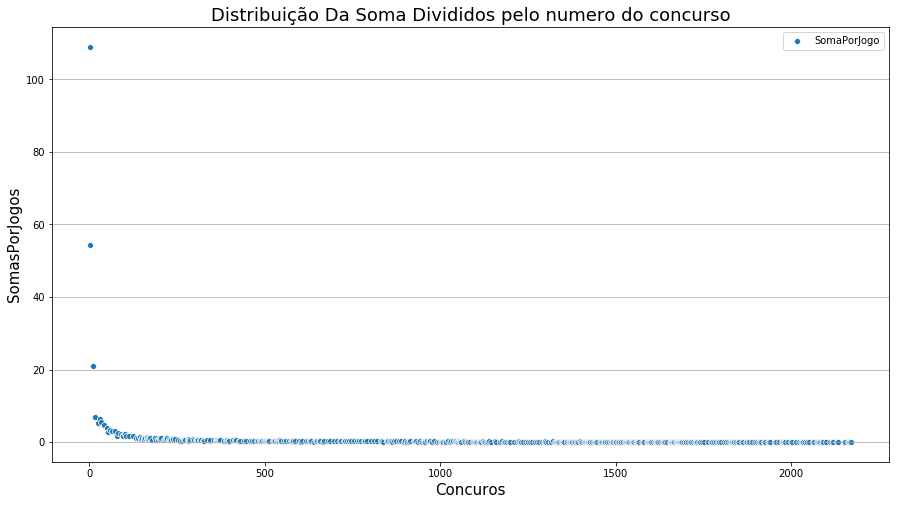

In [7]:
#Grafico scaterplot

fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x="Concurso", y="SomaPorJogo", label="SomaPorJogo", data= df)

ax.set_title('Distribuição Da Soma Divididos pelo numero do concurso', fontsize=18)

plt.legend()
plt.ylabel('SomasPorJogos', fontsize= 15)
plt.xlabel('Concuros', fontsize= 15)
plt.grid(axis='y')
plt.show

<p> Observando o grafico, para uma análise mais apurada vou eliminar os 30 primeiros jogos vencedores, onde o numero dos sorteios são muito baixos e analisar melhor os resultados da sequencia.</p>

In [14]:
#informações da coluna SomaPorJogo
df['SomaPorJogo'].describe()

count    505.000000
mean       0.715397
std        5.515549
min        0.036133
25%        0.103093
50%        0.145333
75%        0.295977
max      109.000000
Name: SomaPorJogo, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

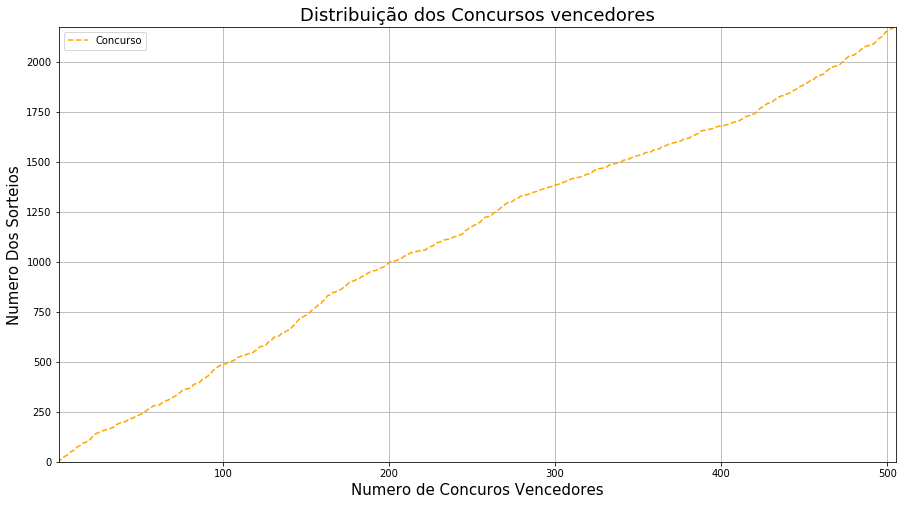

In [34]:
#grafico dos numeros dos jogos vencedores
fig, ax = plt.subplots(figsize=(15,8))

             
plt.plot(df['Concurso'], 'k--', color='orange') #faz a linha ficar laranja e tracejada
#plt.plot(df['Concurso'], 'r^') #Colocaria triangulos vermelhos na linha do grafico
plt.axis([1,505,1,2175])
ax.set_title('Distribuição dos Concursos vencedores', fontsize=18)

plt.legend()
plt.ylabel('Numero Dos Sorteios', fontsize= 15)
plt.xlabel('Numero de Concuros Vencedores', fontsize= 15)
plt.grid(True)
plt.show